# [In Progress]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import svm, tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df_red_wine = pd.read_csv("../datasets/winequality-red.csv", delimiter=";")
df_white_wine = pd.read_csv("../datasets/winequality-white.csv", delimiter=";")

In [3]:
print("quantity registers red wine: ", len(df_red_wine))
print("quantity registers white wine: ", len(df_white_wine))

quantity registers red wine:  1599
quantity registers white wine:  4898


In [4]:
df_red_wine.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df_red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
df_white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

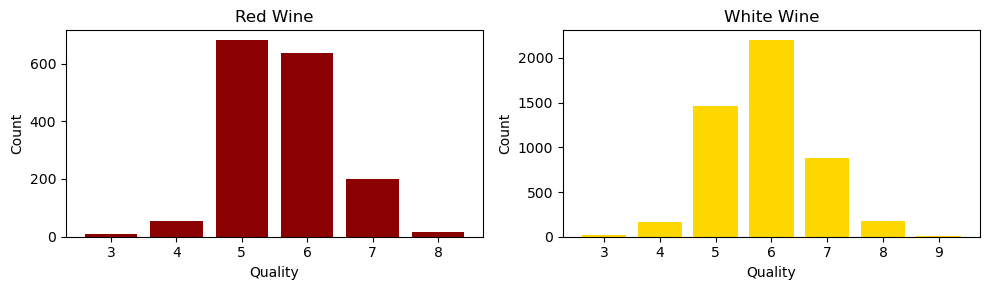

In [7]:
red_wine_color = '#8B0000'
white_wine_color = '#FFD700'

red_wine_quality_counts = df_red_wine['quality'].value_counts().sort_index()
white_wine_quality_counts = df_white_wine['quality'].value_counts().sort_index()

fig = plt.figure(figsize=(10, 3))
spec = fig.add_gridspec(nrows=1, ncols=2)

ax1 = fig.add_subplot(spec[0, 0]) # Red Wine
ax2 = fig.add_subplot(spec[0, 1]) # White Wine

ax1.set_title('Red Wine')
ax1.bar(red_wine_quality_counts.index, red_wine_quality_counts.values, color=red_wine_color)
ax1.set_xlabel('Quality')
ax1.set_ylabel('Count')

ax2.set_title('White Wine')
ax2.bar(white_wine_quality_counts.index, white_wine_quality_counts.values, color=white_wine_color)
ax2.set_xlabel('Quality')
ax2.set_ylabel('Count')

plt.tight_layout() 
plt.show()

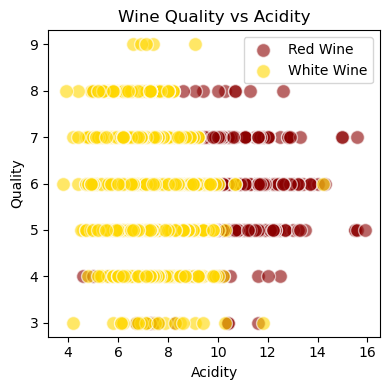

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(df_red_wine["fixed acidity"], df_red_wine["quality"], color=red_wine_color, label='Red Wine', alpha=0.6, edgecolors='w', s=100)

ax.scatter(df_white_wine["fixed acidity"], df_white_wine["quality"], color=white_wine_color, label='White Wine', alpha=0.6, edgecolors='w', s=100)

ax.set_title('Wine Quality vs Acidity')
ax.set_xlabel('Acidity')
ax.set_ylabel('Quality')
ax.legend()

plt.tight_layout()
plt.show()

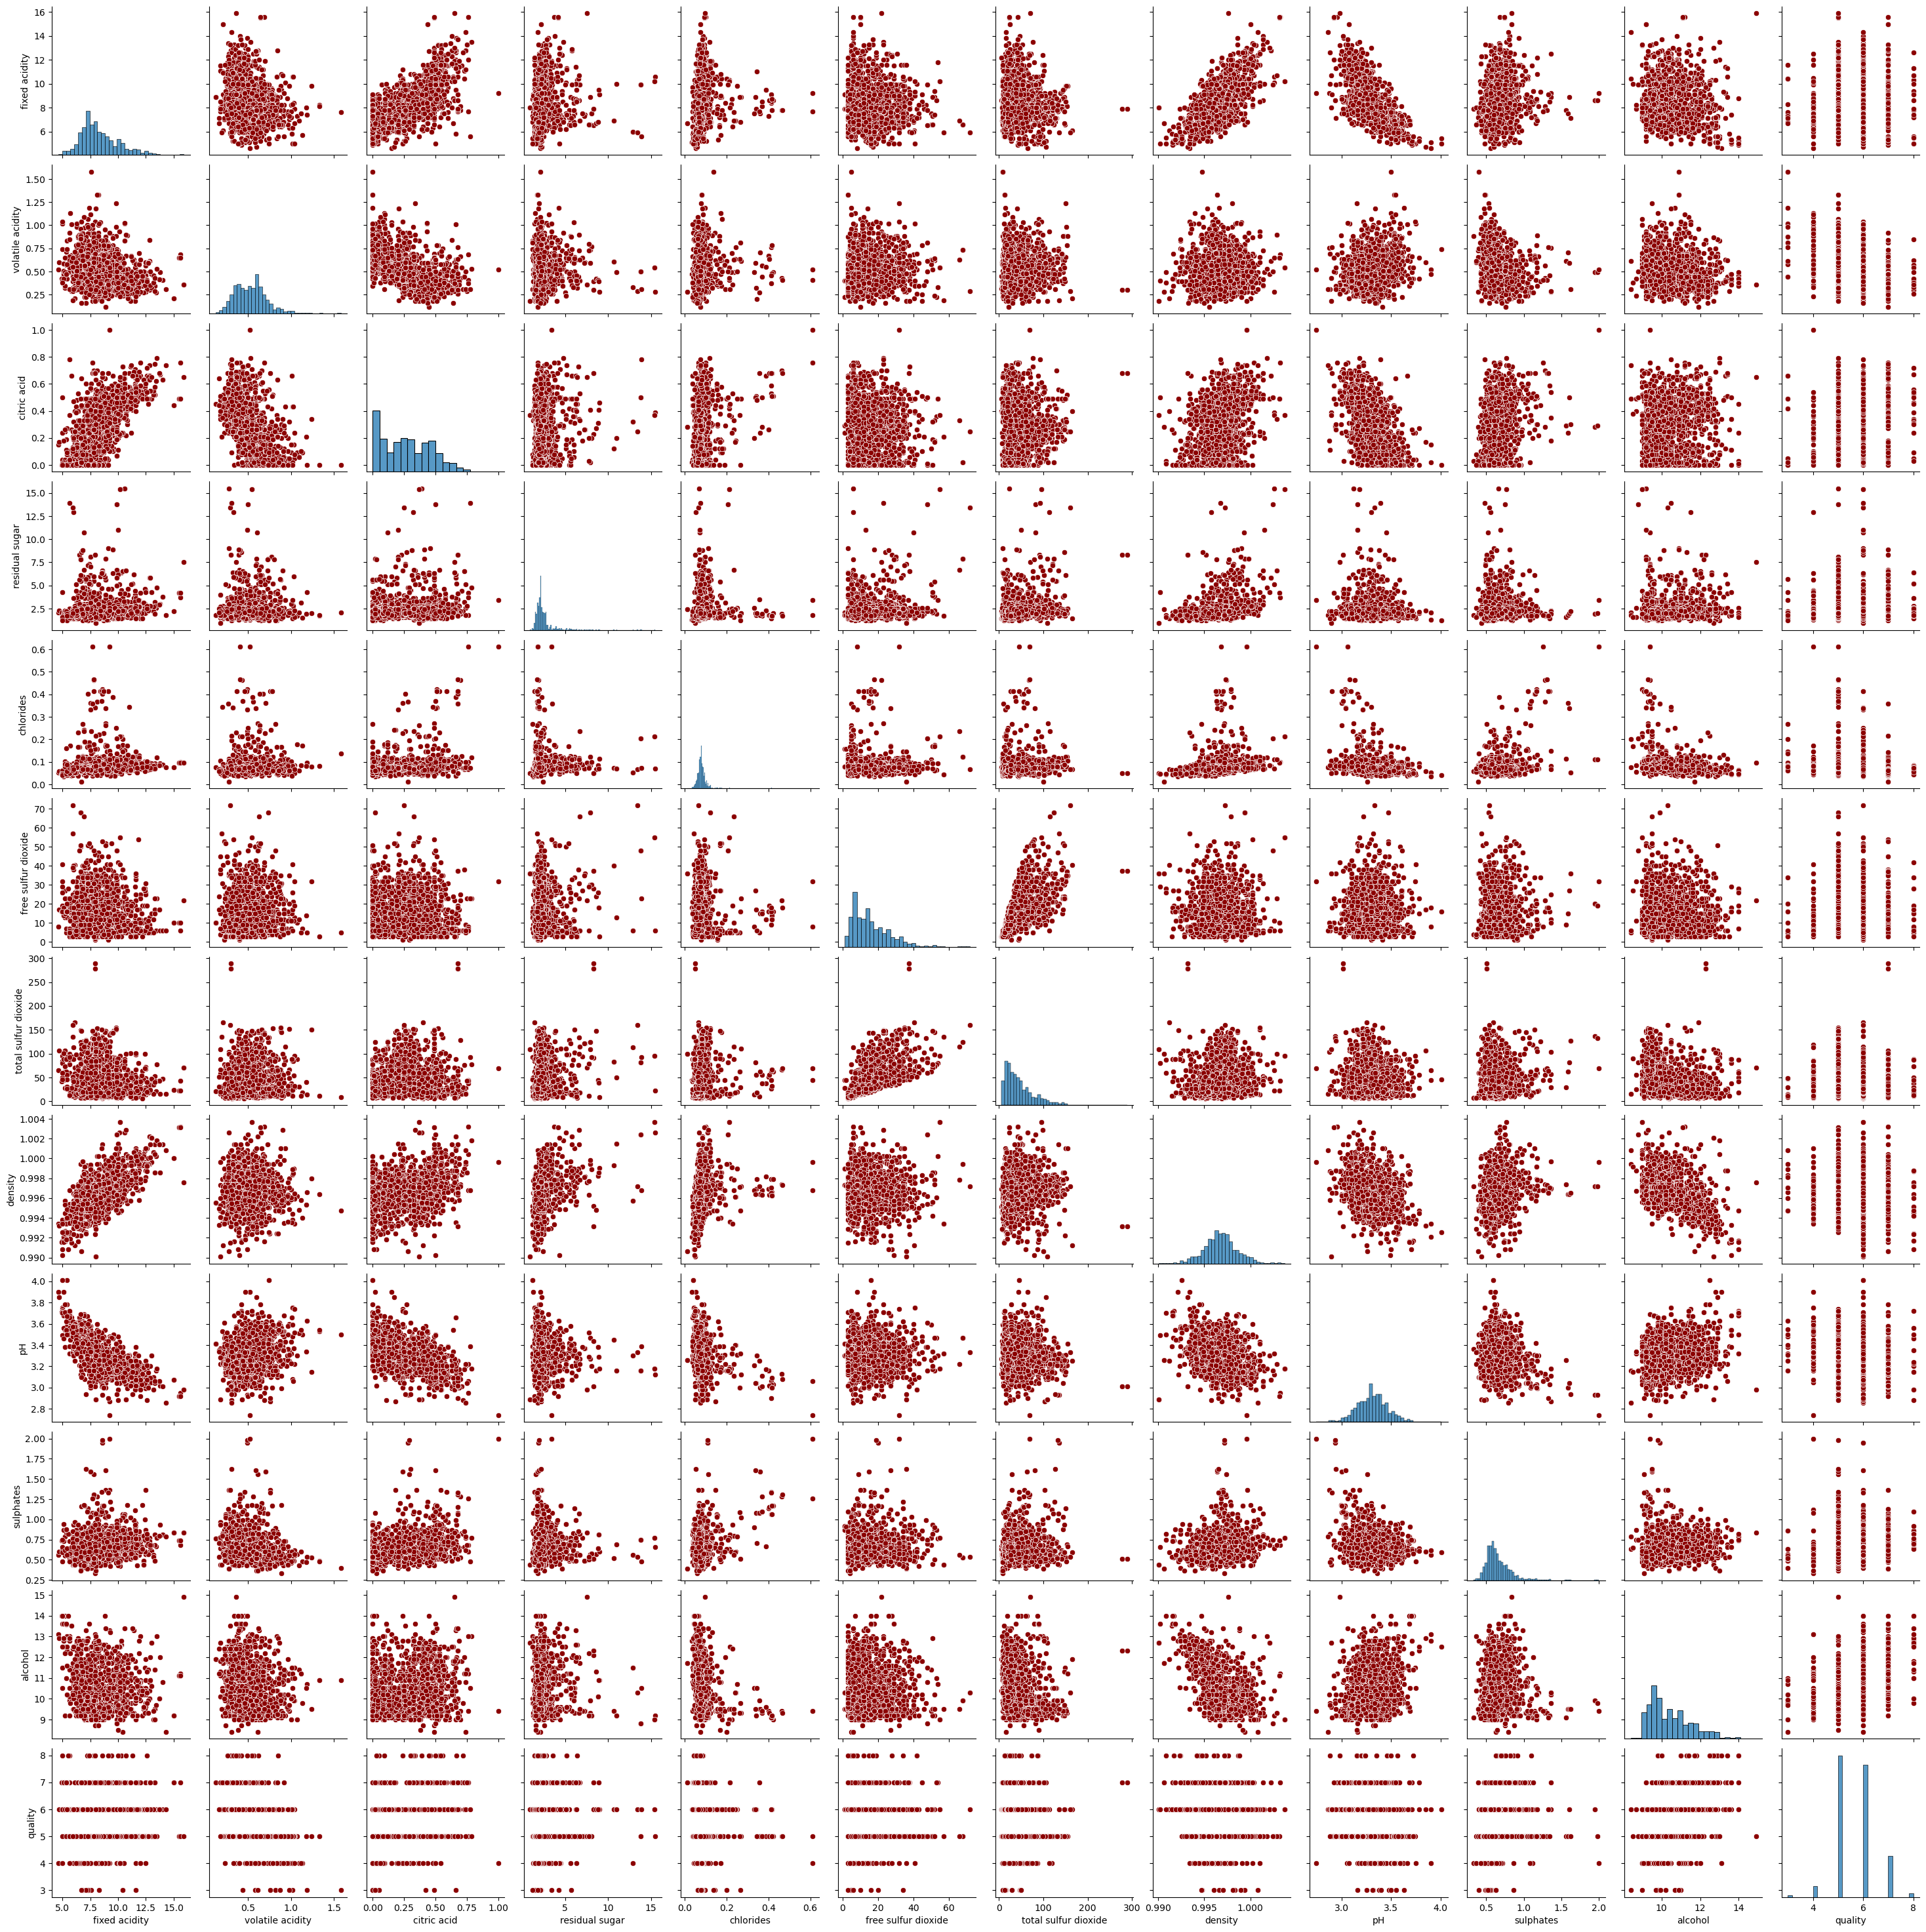

In [9]:
sns.pairplot(df_red_wine, plot_kws={'color': red_wine_color})
plt.show()

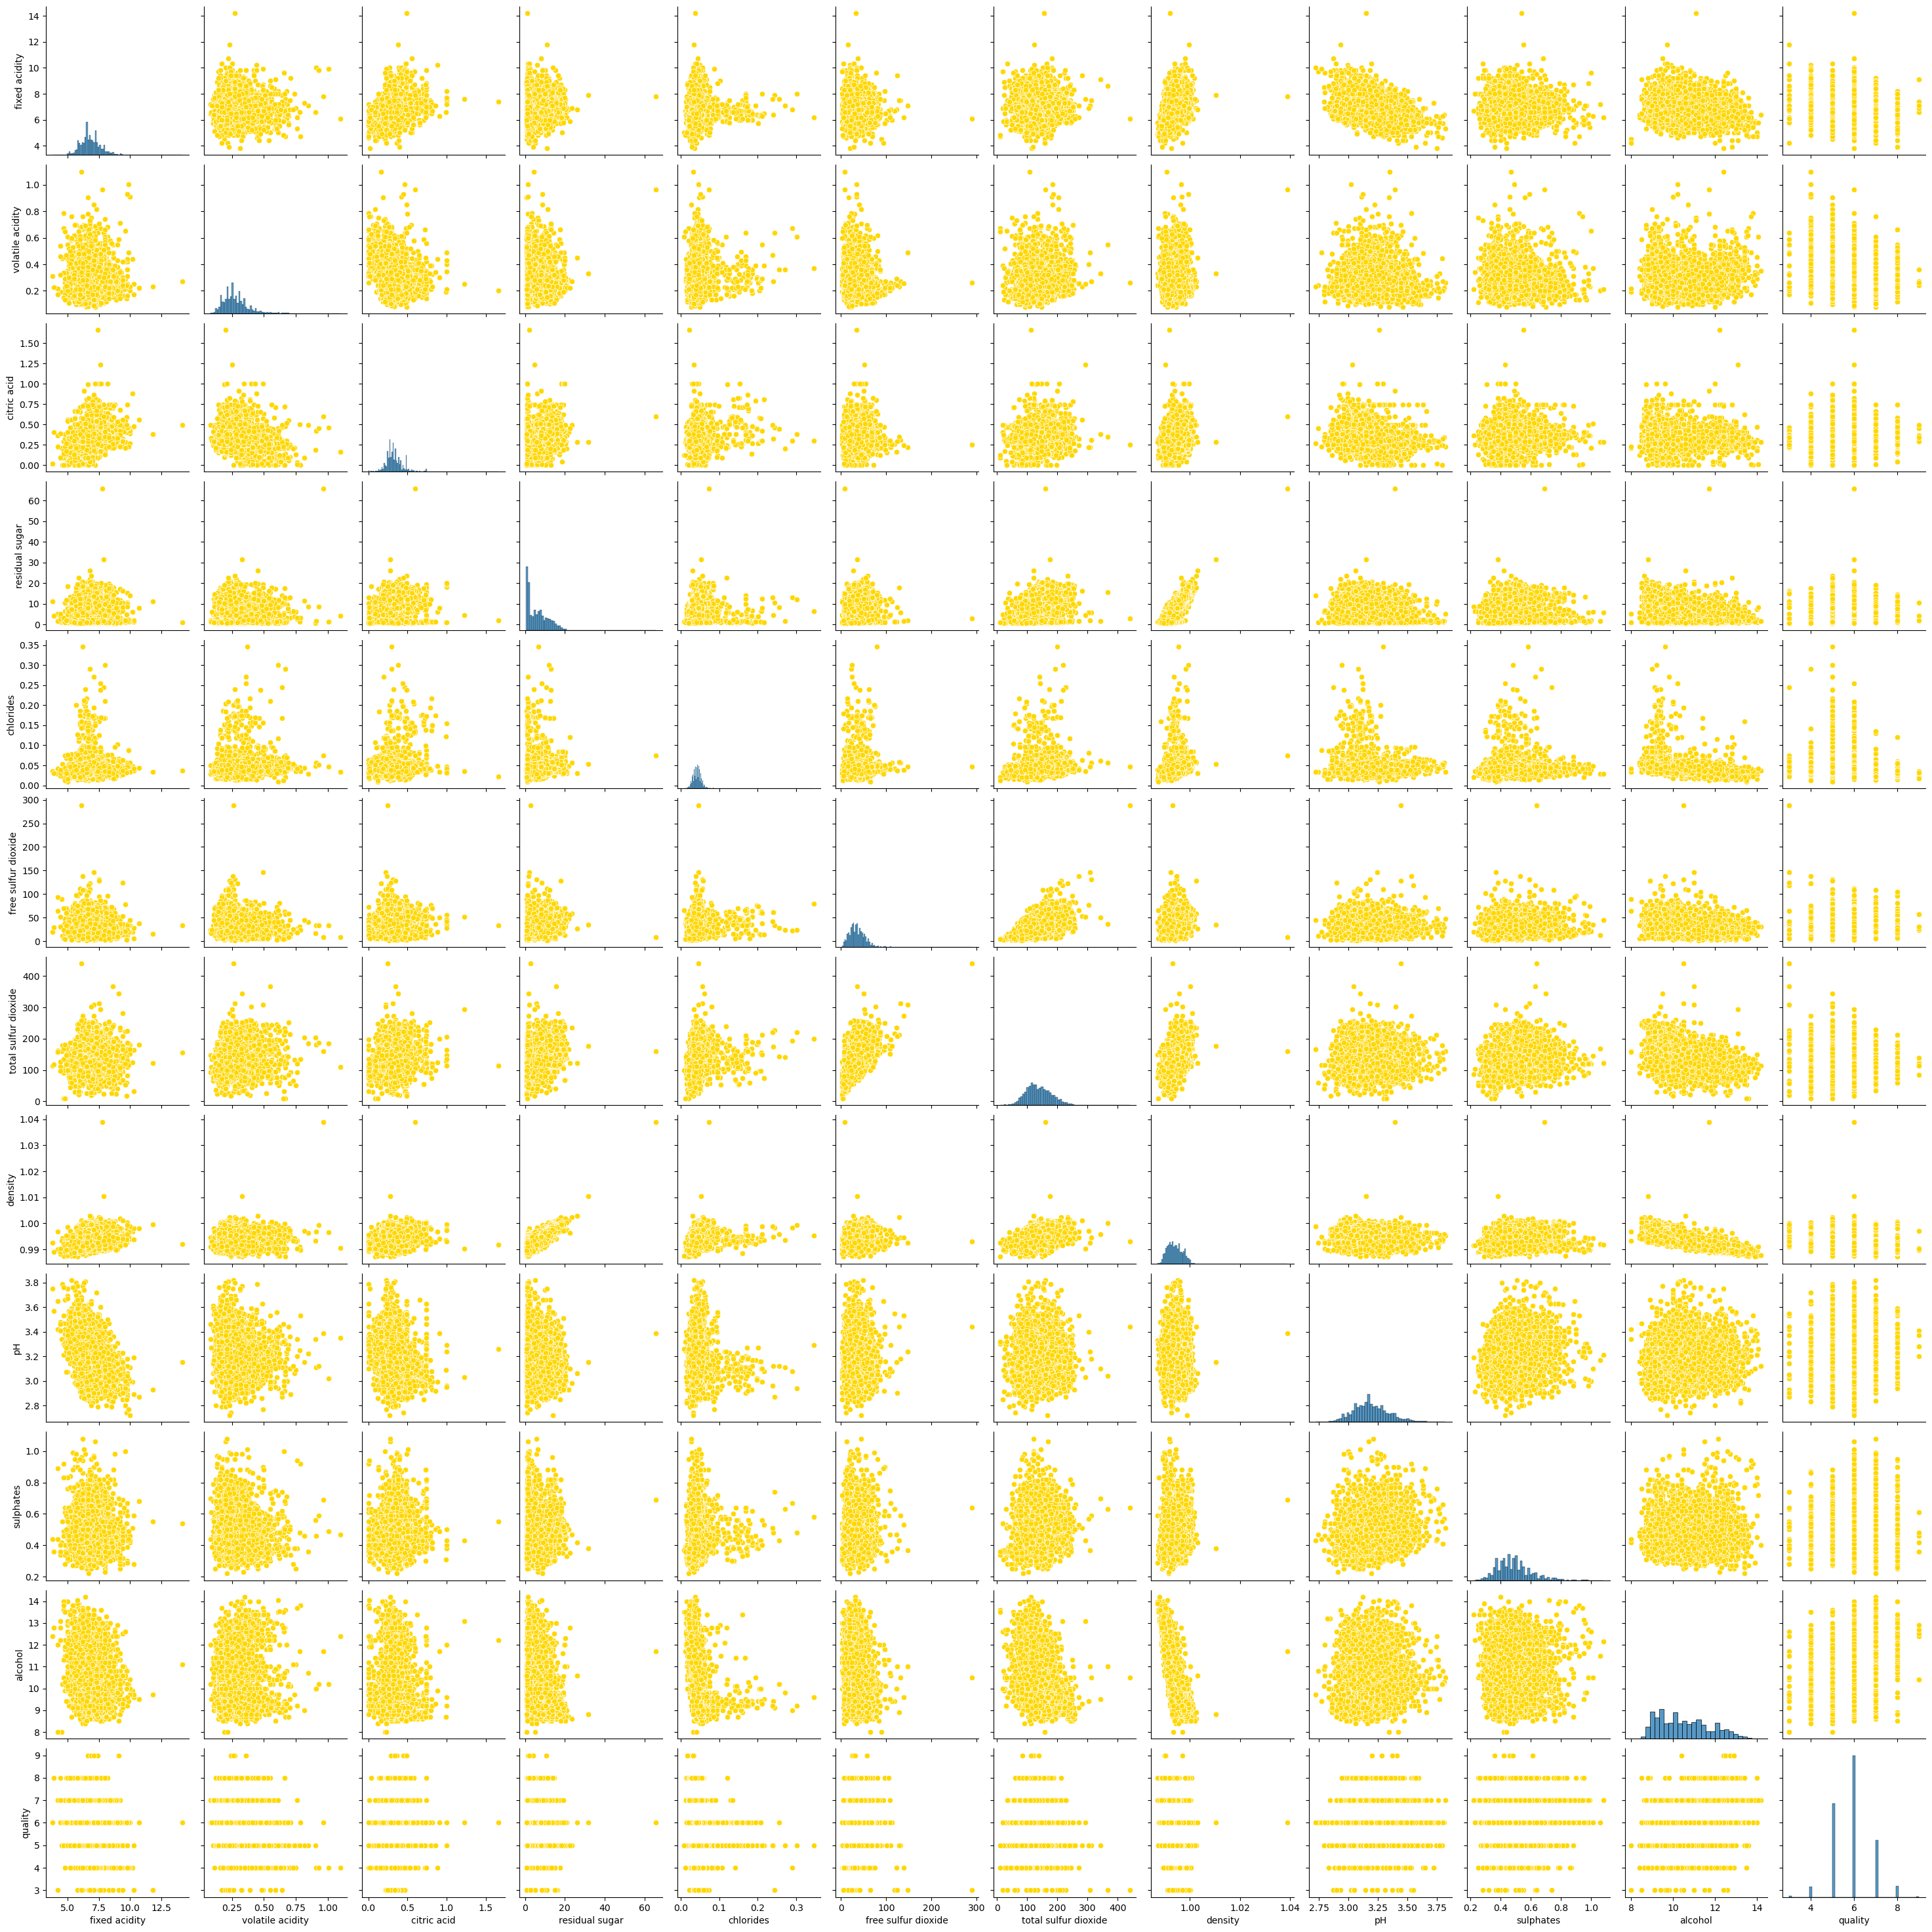

In [10]:
sns.pairplot(df_white_wine, plot_kws={'color': white_wine_color})
plt.show()

In [11]:
df_red_wine = pd.read_csv("../datasets/winequality-red.csv", delimiter=";")
X = df_red_wine.iloc[:,0:(df_red_wine.shape[1] - 1)]
y = df_red_wine.iloc[:,(df_red_wine.shape[1] - 1)]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

class_weight = {i: 1 for i in range(1, 11)}

red_wine = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight=class_weight)
red_wine = red_wine.fit(X_train, y_train)

y_pred = red_wine.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6458333333333334


In [12]:
#com validação cruzada
red_wine_with_cross_val = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight=class_weight)
scores = cross_val_score(red_wine_with_cross_val, X, y, cv=3, scoring='accuracy')

print("Scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [0.43902439 0.45778612 0.45966229]
Mean accuracy: 0.45215759849906184
Standard deviation: 0.0093181140873992


In [13]:
### separar em duas classificações, bom e ruim 
df_red_wine = pd.read_csv("../datasets/winequality-red.csv", delimiter=";")
df_red_wine['quality'] = df_red_wine['quality'].apply(lambda x: 0 if x <= 5 else 1)

counts = df_red_wine['quality'].value_counts()

print("Number of 0s:", counts[0])
print("Number of 1s:", counts[1])

Number of 0s: 744
Number of 1s: 855


In [14]:
X = df_red_wine.iloc[:,0:(df_red_wine.shape[1] - 1)]
y = df_red_wine.iloc[:,(df_red_wine.shape[1] - 1)]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

class_weight = {i: 0 for i in range(0, 2)}

red_wine = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight=class_weight)
red_wine = red_wine.fit(X_train, y_train)

y_pred = red_wine.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.4375


In [15]:
svr = svm.SVC()

#TESTAR COM MAIS PARAMETROS
#params = {
#    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#    'C': [0.1, 1, 10, 100],
#    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
#    'degree': [2, 3, 4],
#    'coef0': [0, 0.1, 0.5, 1]
#}

params={'kernel':('linear', 'rbf'), 'C':[1, 10]}

classificadorGrid = GridSearchCV(svr, param_grid=params)

y_pred = classificadorGrid.fit(X_train, y_train).predict(X_test)
print("Best parameters set found on development set:")
print(classificadorGrid.best_params_,'\n')

target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

Best parameters set found on development set:
{'C': 10, 'kernel': 'linear'} 

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       105
           1       0.79      0.76      0.77       135

    accuracy                           0.75       240
   macro avg       0.75      0.75      0.75       240
weighted avg       0.75      0.75      0.75       240



In [ ]:
### testar ainda: outros metodos de aprendizagem
### vinho branco

### References
CORTEZ, Paulo et al. Modeling wine preferences by data mining from physicochemical properties. **Decision support systems**, v. 47, n. 4, p. 547-553, 2009.